<a href="https://colab.research.google.com/github/KevinKuslin/MachineLearning2025/blob/main/SampleML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Cek GPU Tesla T4 milik Colab

In [1]:
!nvidia-smi

Sun Nov  2 07:29:53 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   45C    P8             11W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

# Import Library

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn import metrics
from sklearn.svm import SVC
from xgboost import XGBRegressor
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.ensemble import RandomForestRegressor


# Import dari Lokal ke Colab

In [27]:
from google.colab import files
uploadVar = list((files.upload().keys()))[0]
df = pd.read_csv(uploadVar)
df.head()

Saving calories.csv to calories (1).csv


,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8,35.0


# Jumlah Data dan Data Type Dataset

In [4]:
print(df.shape) # df.tuple bentuknya tuple
df.info()

(15000, 9)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   User_ID     15000 non-null  int64  
 1   Gender      15000 non-null  object 
 2   Age         15000 non-null  int64  
 3   Height      15000 non-null  float64
 4   Weight      15000 non-null  float64
 5   Duration    15000 non-null  float64
 6   Heart_Rate  15000 non-null  float64
 7   Body_Temp   15000 non-null  float64
 8   Calories    15000 non-null  float64
dtypes: float64(6), int64(2), object(1)
memory usage: 1.0+ MB


# Deskripsi Dataset

In [5]:
df.describe()

,User_ID,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
count,1.500000e+04,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,1.497736e+07,42.789800,174.465133,74.966867,15.530600,95.518533,40.025453,89.539533
std,2.872851e+06,16.980264,14.258114,15.035657,8.319203,9.583328,0.779230,62.456978
min,1.000116e+07,20.000000,123.000000,36.000000,1.000000,67.000000,37.100000,1.000000
25%,1.247419e+07,28.000000,164.000000,63.000000,8.000000,88.000000,39.600000,35.000000
50%,1.499728e+07,39.000000,175.000000,74.000000,16.000000,96.000000,40.200000,79.000000
75%,1.744928e+07,56.000000,185.000000,87.000000,23.000000,103.000000,40.600000,138.000000
max,1.999965e+07,79.000000,222.000000,132.000000,30.000000,128.000000,41.500000,314.000000


# Exploratory Data Analysis: Scatterplot Height vs Weight

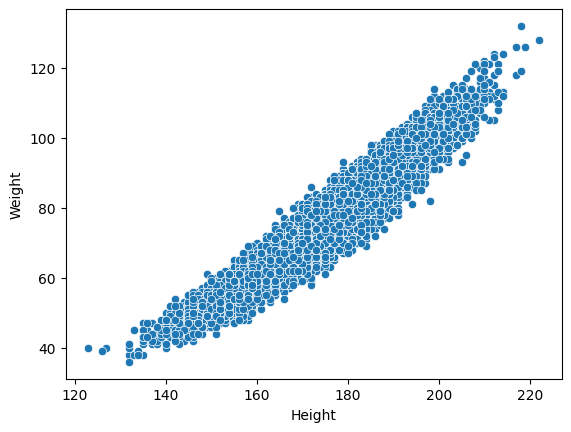

In [6]:
sb.scatterplot(x='Height', y='Weight', data=df)
plt.show()

# Exploratory Data Analysis: (Age, Height, Weight, Duration) vs Calories

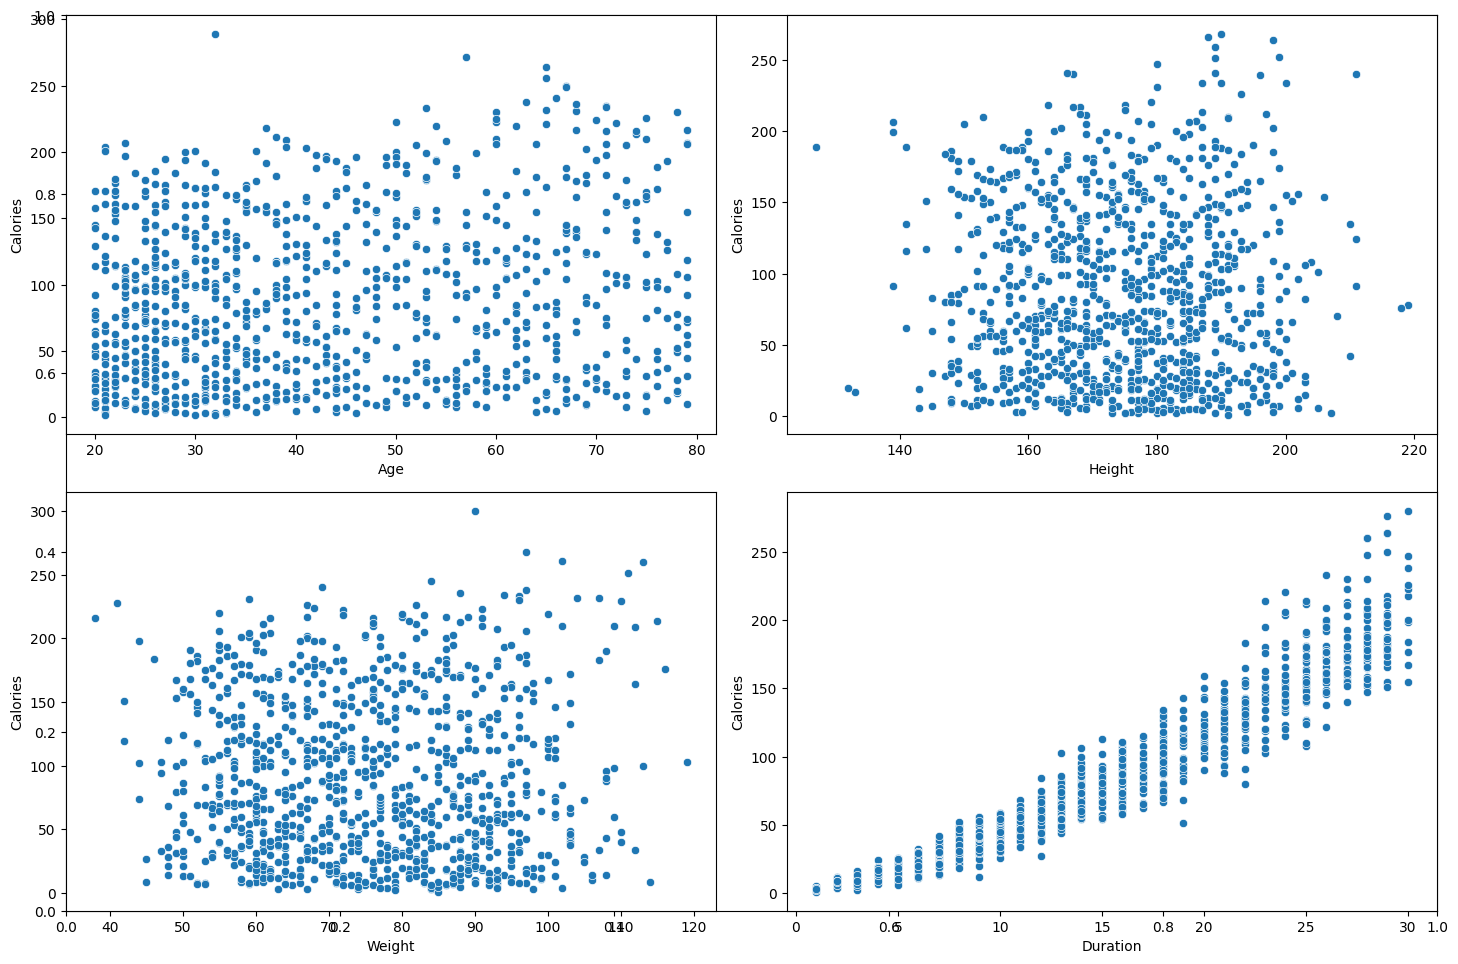

In [16]:
features = ['Age', 'Height', 'Weight', 'Duration']
target = 'Calories'
plt.subplots(figsize=(15, 10))

for i, col in enumerate(features):
  plt.subplot(2, 2, i+1)
  x = df.sample(1000)
  sb.scatterplot(x=col, y=target, data=x)
plt.tight_layout()
plt.show()

# Exploratory Data Analysis: Distribution Plot dari Semua Fitur

/tmp/ipython-input-1891074642.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sb.distplot(df[col])
/tmp/ipython-input-1891074642.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sb.distplot(df[col])
/tmp/ipython-input-1891074642.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seabor

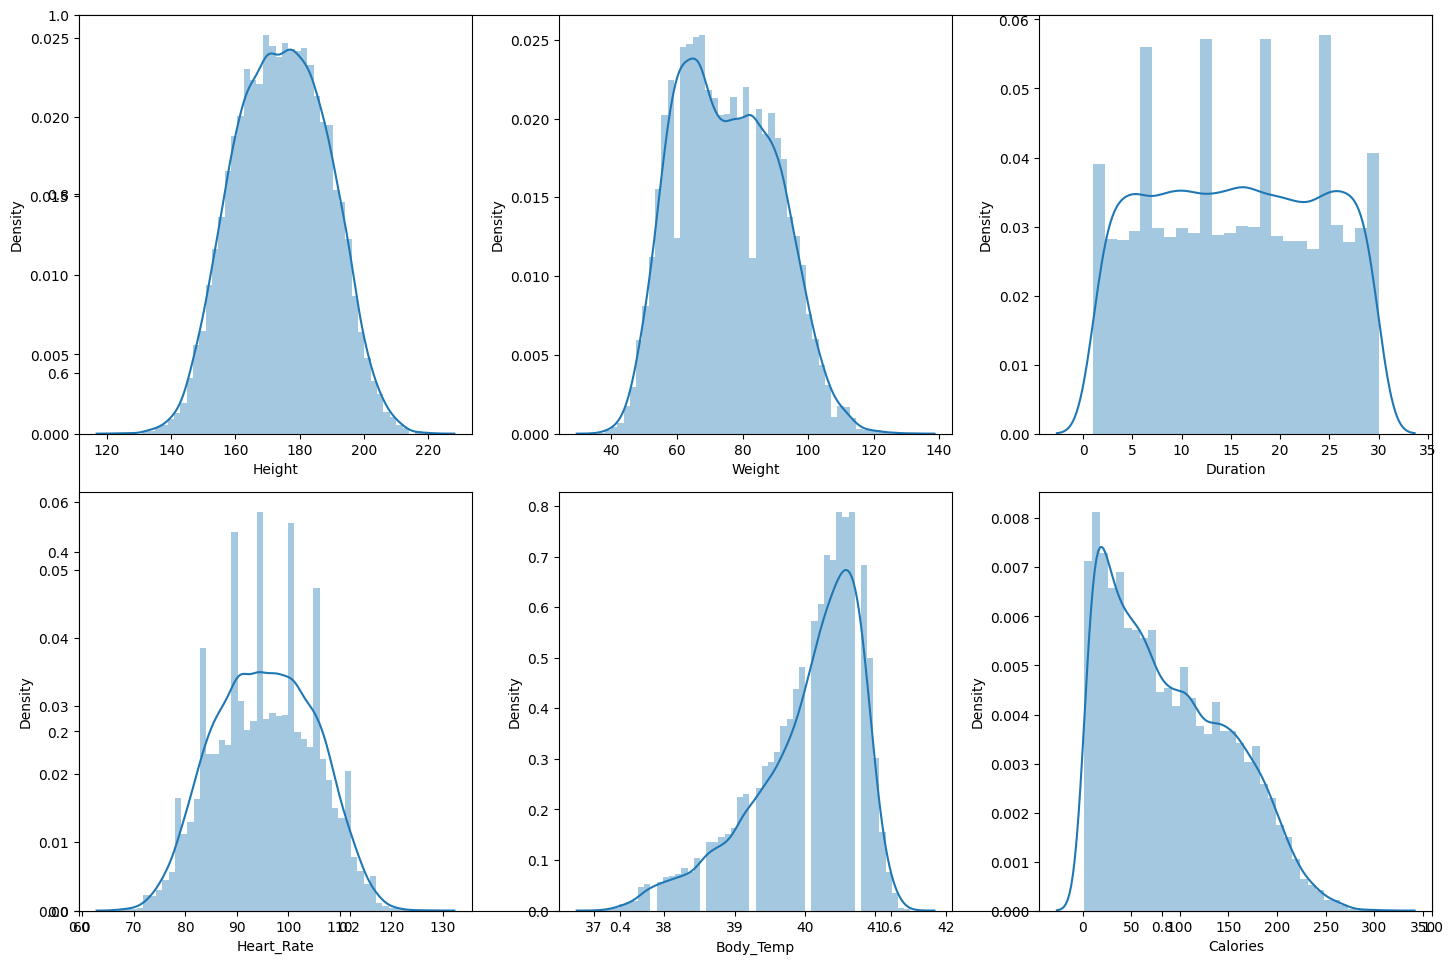

In [22]:
features = df.select_dtypes(include='float').columns

plt.subplots(figsize=(15,10))
for i, col in enumerate(features):
  plt.subplot(2, 3, i+1)
  sb.distplot(df[col])
plt.tight_layout()
plt.show()

# Exploratory Data Analysis: Numerisasi Fitur 'Gender'

In [28]:
df.replace({'male': 0, 'female': 1}, inplace=True)
df.head()

/tmp/ipython-input-139415220.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({'male': 0, 'female': 1}, inplace=True)


,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,0,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,1,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,0,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,1,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,1,27,154.0,58.0,10.0,81.0,39.8,35.0


# Correlation Analysis: Heat Map

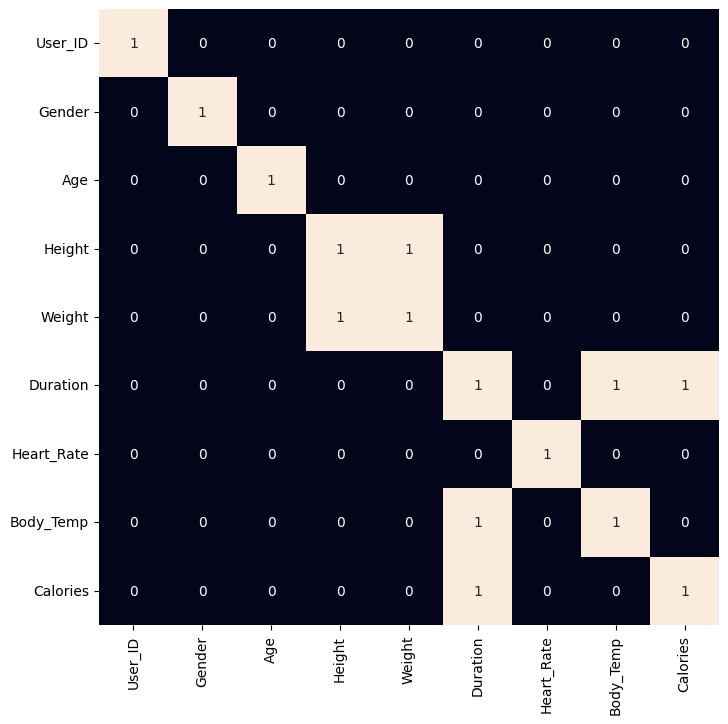

In [33]:
plt.figure(figsize=(8, 8))
sb.heatmap(df.corr() > 0.9, annot=True, cbar=False)
plt.show()

# Hapus Data: Weight & Duration

In [34]:
data_remove = ['Weight', 'Duration']
df.drop(data_remove, axis=1, inplace=True)
df.head()

,User_ID,Gender,Age,Height,Heart_Rate,Body_Temp,Calories
0,14733363,0,68,190.0,105.0,40.8,231.0
1,14861698,1,20,166.0,94.0,40.3,66.0
2,11179863,0,69,179.0,88.0,38.7,26.0
3,16180408,1,34,179.0,100.0,40.5,71.0
4,17771927,1,27,154.0,81.0,39.8,35.0


# Dataset Splitting  

In [37]:
features = df.drop(['User_ID', 'Calories'], axis=1)
target = df['Calories'].values

X_train, X_val, Y_train, Y_val = train_test_split(features, target, test_size=0.1, random_state=22)
X_train.shape, X_val.shape

((13500, 5), (1500, 5))

# Training

In [ ]:
from sklearn.metrics import mean_absolute_error as mae
models = [LinearRegression(), XGBRegressor(), Lasso(), RandomForestRegressor(), Ridge()]

for i in range(5):
  models[i].fit(X_train, Y_train)
  print(f'{models[i]} : ')

  train_preds = models[i].predict(X_train)
  print('Training Error : ', mae(Y_train, train_preds))

  val_preds = models[i].predic(X_val)
  print('Validation Error : ', mae(Y_val, train_preds))
  print()